In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, QuantileTransformer
from sklearn.impute import SimpleImputer
import numpy as np

In [2]:
import sys
import os
from os.path import dirname
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
sys.path.append(dirname('../src'))
from src.utils import utils
data = utils.load_df("../Data/feature_eng.pkl")
data.head(5)

,cx_curp,ventana,sexo,sum_num_consultas,avg_num_consultas_by_year,dm,año_dx_dm,dm_años_flt,dm_años_int,hta,...,SEDANTES HIPNOTICOS,SOLUCIONES ELECTROLITICAS,SUEROS INMUNITARIOS,TOXOIDES,TROMBOLITICOS,VACUNAS,VASOPRESORES,VITAMINAS,label,ANTIMIGRANOSOS
0,AADV5603014KS44QC1,1,M,25,12.5,1,1999,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0.0
1,AADV5603014KS44QC1,2,M,23,11.5,1,1999,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0.0
2,AADV5603014KS44QC1,3,M,21,10.5,1,1999,NaN,NaN,0,...,0,0,0,0,0,0,0,1,0,0.0
3,AADV5603014KS44QC1,4,M,20,10,1,1999,NaN,NaN,0,...,1,0,0,0,0,0,0,1,1,0.0
4,AEDJ750301XGAEGRC1,1,M,4,2,0,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,1,0,0.0


<AxesSubplot:>

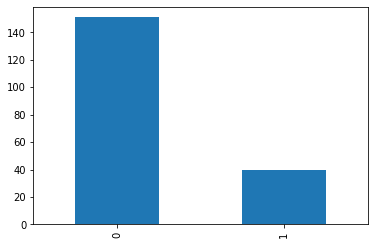

In [3]:
data['label'].value_counts().plot.bar()

In [4]:
data[data['sum_num_consultas']==0]

,cx_curp,ventana,sexo,sum_num_consultas,avg_num_consultas_by_year,dm,año_dx_dm,dm_años_flt,dm_años_int,hta,...,SEDANTES HIPNOTICOS,SOLUCIONES ELECTROLITICAS,SUEROS INMUNITARIOS,TOXOIDES,TROMBOLITICOS,VACUNAS,VASOPRESORES,VITAMINAS,label,ANTIMIGRANOSOS
6,AEDJ750301XGAEGRC1,3,,0,0,0,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0.0
27,COPI690401V91QCRC2,5,,0,0,0,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0.0
28,COPI690401V91QCRC2,6,,0,0,0,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0.0
29,COPI690401V91QCRC2,7,,0,0,0,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0.0
62,GAMP640301UJL5SEE1,7,,0,0,0,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0.0
63,GAMP640301UJL5SEE1,8,,0,0,0,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0.0
76,GUSJ5712286XUN73A2,2,,0,0,0,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0.0
77,GUSJ5712286XUN73A2,3,,0,0,0,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0.0
78,GUSJ5712286XUN73A2,4,,0,0,0,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0.0
79,GUSJ5712286XUN73A2,5,,0,0,0,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,1,0.0


- Eliminando filas que no aportan información

In [5]:
data = data[data['sum_num_consultas']>0]
data = data.reset_index()
data = data.drop(columns=['index'])
data

,cx_curp,ventana,sexo,sum_num_consultas,avg_num_consultas_by_year,dm,año_dx_dm,dm_años_flt,dm_años_int,hta,...,SEDANTES HIPNOTICOS,SOLUCIONES ELECTROLITICAS,SUEROS INMUNITARIOS,TOXOIDES,TROMBOLITICOS,VACUNAS,VASOPRESORES,VITAMINAS,label,ANTIMIGRANOSOS
0,AADV5603014KS44QC1,1,M,25,12.5,1,1999,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0.0
1,AADV5603014KS44QC1,2,M,23,11.5,1,1999,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0.0
2,AADV5603014KS44QC1,3,M,21,10.5,1,1999,NaN,NaN,0,...,0,0,0,0,0,0,0,1,0,0.0
3,AADV5603014KS44QC1,4,M,20,10,1,1999,NaN,NaN,0,...,1,0,0,0,0,0,0,1,1,0.0
4,AEDJ750301XGAEGRC1,1,M,4,2,0,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,ZAGM6412151ICF4PC4,2,F,15,7.5,1,2013,1.29919,0.733333,0,...,0,0,0,0,0,0,0,1,1,0.0
162,ZEPL5503219FZQ6QC2,1,F,10,5,0,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,1,0,0.0
163,ZEPL5503219FZQ6QC2,2,F,5,2.5,0,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,1,0,0.0
164,ZEPL5503219FZQ6QC2,3,F,6,3,0,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,1,0,0.0


In [6]:
list(data)

['cx_curp',
 'ventana',
 'sexo',
 'sum_num_consultas',
 'avg_num_consultas_by_year',
 'dm',
 'año_dx_dm',
 'dm_años_flt',
 'dm_años_int',
 'hta',
 'año_dx_hta',
 'hta_años_flt',
 'hta_años_int',
 'renal',
 'renal_años_flt',
 'renal_años_int',
 'edad_range',
 'epoca_nac',
 'imc_range',
 'num_med',
 'avg_num_med',
 'min_num_med',
 'max_num_med',
 'preglucosa',
 'num_med_preglucosa',
 'avg_preglucosa',
 'min_preglucosa',
 'max_preglucosa',
 'postglucosa',
 'num_med_postglucosa',
 'avg_postglucosa',
 'min_postglucosa',
 'max_postglucosa',
 'colesterol',
 'num_med_colesterol',
 'avg_colesterol',
 'min_colesterol',
 'max_colesterol',
 'trigliceridos',
 'num_med_trigliceridos',
 'avg_trigliceridos',
 'min_trigliceridos',
 'max_trigliceridos',
 'hdl',
 'num_med_hdl',
 'avg_hdl',
 'min_hdl',
 'max_hdl',
 'ldl',
 'num_med_ldl',
 'avg_ldl',
 'min_ldl',
 'max_ldl',
 'presion_arterial',
 'num_med_presion_a',
 'avg_sistolica_a',
 'min_sistolica_a',
 'max_sistolica_a',
 'avg_diastolica_a',
 'min_dias

<AxesSubplot:>

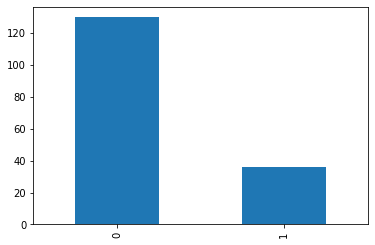

In [7]:
data['label'].value_counts().plot.bar()

- Eliminando columnas que no aportan información

In [8]:
subset_df = data.loc[:, data.isnull().all()]
col_null = list(subset_df.columns)
col_null

['año_dx_hta',
 'hta_años_flt',
 'hta_años_int',
 'num_med_ldl',
 'avg_ldl',
 'min_ldl',
 'max_ldl',
 'num_med_plaquetas',
 'avg_plaquetas',
 'min_plaquetas',
 'max_plaquetas',
 'ANTIMIGRAÑOSOS']

In [9]:
data.drop(col_null, axis=1, inplace=True)
list(data.columns)

['cx_curp',
 'ventana',
 'sexo',
 'sum_num_consultas',
 'avg_num_consultas_by_year',
 'dm',
 'año_dx_dm',
 'dm_años_flt',
 'dm_años_int',
 'hta',
 'renal',
 'renal_años_flt',
 'renal_años_int',
 'edad_range',
 'epoca_nac',
 'imc_range',
 'num_med',
 'avg_num_med',
 'min_num_med',
 'max_num_med',
 'preglucosa',
 'num_med_preglucosa',
 'avg_preglucosa',
 'min_preglucosa',
 'max_preglucosa',
 'postglucosa',
 'num_med_postglucosa',
 'avg_postglucosa',
 'min_postglucosa',
 'max_postglucosa',
 'colesterol',
 'num_med_colesterol',
 'avg_colesterol',
 'min_colesterol',
 'max_colesterol',
 'trigliceridos',
 'num_med_trigliceridos',
 'avg_trigliceridos',
 'min_trigliceridos',
 'max_trigliceridos',
 'hdl',
 'num_med_hdl',
 'avg_hdl',
 'min_hdl',
 'max_hdl',
 'ldl',
 'presion_arterial',
 'num_med_presion_a',
 'avg_sistolica_a',
 'min_sistolica_a',
 'max_sistolica_a',
 'avg_diastolica_a',
 'min_diastolica_a',
 'max_diastolica_a',
 'map_g',
 'hba1c',
 'num_med_hba1c',
 'avg_hba1c',
 'min_hba1c',
 'm

In [10]:
display(data[['imc_range']])
data = data.loc[:,~data.columns.duplicated()].copy()
data[['imc_range']]

,imc_range
0,4
1,4
2,4
3,4
4,4
...,...
161,3
162,2
163,3
164,3


,imc_range
0,4
1,4
2,4
3,4
4,4
...,...
161,3
162,2
163,3
164,3


In [11]:
data.shape

(166, 288)

In [12]:
data['imc_range'].unique()

array([4, 3, 2, 1, nan], dtype=object)

In [13]:
data[pd.isna(data['imc_range'])]

,cx_curp,ventana,sexo,sum_num_consultas,avg_num_consultas_by_year,dm,año_dx_dm,dm_años_flt,dm_años_int,hta,...,SEDANTES HIPNOTICOS,SOLUCIONES ELECTROLITICAS,SUEROS INMUNITARIOS,TOXOIDES,TROMBOLITICOS,VACUNAS,VASOPRESORES,VITAMINAS,label,ANTIMIGRANOSOS
120,PAGJ690411WZ0YDRC1,3,M,1,0.5,1,2007,3.97057,3,0,...,0,0,0,0,0,0,0,0,0,0.0
121,PAGJ690411WZ0YDRC1,4,M,1,0.5,1,2007,3.97057,3,0,...,0,0,0,0,0,0,0,0,0,0.0


In [14]:
data[data['cx_curp']=='PAGJ690411WZ0YDRC1'][['ventana','imc_range']]

,ventana,imc_range
119,1,4
120,3,NaN
121,4,NaN
122,12,3


In [15]:
#data['imc_range'] = data['imc_range'].fillna('Sin dato')
#data['sexo'] = data['sexo'].fillna('Sin dato')
data.loc[(data['sexo'] == 'M'), 'sexo'] = 1
data.loc[(data['sexo'] == 'F'), 'sexo'] = 2

In [16]:
data['sexo'].unique()

array([1, 2], dtype=object)

In [17]:
#df_st = data[['sexo','imc_range']]
#display(df_st.head(5))
#df1 = data.drop(['sexo','imc_range'], axis=1)
#display(df1.head(5))

In [18]:
data[pd.isna(data['label'])][['cx_curp','ventana','label']]

,cx_curp,ventana,label


In [19]:
cx_curp = data['cx_curp'] 
data = data.drop(['cx_curp'], axis=1)

In [20]:
data

,ventana,sexo,sum_num_consultas,avg_num_consultas_by_year,dm,año_dx_dm,dm_años_flt,dm_años_int,hta,renal,...,SEDANTES HIPNOTICOS,SOLUCIONES ELECTROLITICAS,SUEROS INMUNITARIOS,TOXOIDES,TROMBOLITICOS,VACUNAS,VASOPRESORES,VITAMINAS,label,ANTIMIGRANOSOS
0,1,1,25,12.5,1,1999,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,2,1,23,11.5,1,1999,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,3,1,21,10.5,1,1999,NaN,NaN,0,0,...,0,0,0,0,0,0,0,1,0,0.0
3,4,1,20,10,1,1999,NaN,NaN,0,0,...,1,0,0,0,0,0,0,1,1,0.0
4,1,1,4,2,0,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,2,2,15,7.5,1,2013,1.29919,0.733333,0,0,...,0,0,0,0,0,0,0,1,1,0.0
162,1,2,10,5,0,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,1,0,0.0
163,2,2,5,2.5,0,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,1,0,0.0
164,3,2,6,3,0,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,1,0,0.0


In [21]:
data[pd.isna(data['label'])][['ventana','label']]

,ventana,label


In [22]:
data.shape

(166, 287)

### Imputaciones

In [23]:
col = list(data.columns)
col

['ventana',
 'sexo',
 'sum_num_consultas',
 'avg_num_consultas_by_year',
 'dm',
 'año_dx_dm',
 'dm_años_flt',
 'dm_años_int',
 'hta',
 'renal',
 'renal_años_flt',
 'renal_años_int',
 'edad_range',
 'epoca_nac',
 'imc_range',
 'num_med',
 'avg_num_med',
 'min_num_med',
 'max_num_med',
 'preglucosa',
 'num_med_preglucosa',
 'avg_preglucosa',
 'min_preglucosa',
 'max_preglucosa',
 'postglucosa',
 'num_med_postglucosa',
 'avg_postglucosa',
 'min_postglucosa',
 'max_postglucosa',
 'colesterol',
 'num_med_colesterol',
 'avg_colesterol',
 'min_colesterol',
 'max_colesterol',
 'trigliceridos',
 'num_med_trigliceridos',
 'avg_trigliceridos',
 'min_trigliceridos',
 'max_trigliceridos',
 'hdl',
 'num_med_hdl',
 'avg_hdl',
 'min_hdl',
 'max_hdl',
 'ldl',
 'presion_arterial',
 'num_med_presion_a',
 'avg_sistolica_a',
 'min_sistolica_a',
 'max_sistolica_a',
 'avg_diastolica_a',
 'min_diastolica_a',
 'max_diastolica_a',
 'map_g',
 'hba1c',
 'num_med_hba1c',
 'avg_hba1c',
 'min_hba1c',
 'max_hba1c',
 

In [24]:
# Imputation
my_imputer = SimpleImputer()
d_inp = pd.DataFrame(my_imputer.fit_transform(data))
d_inp

,0,1,2,3,4,5,6,7,8,9,...,277,278,279,280,281,282,283,284,285,286
0,1.0,1.0,25.0,12.5,1.0,1999.000000,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,1.0,23.0,11.5,1.0,1999.000000,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,1.0,21.0,10.5,1.0,1999.000000,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4.0,1.0,20.0,10.0,1.0,1999.000000,1.569907,1.184464,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.0,1.0,4.0,2.0,0.0,2002.408451,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,2.0,2.0,15.0,7.5,1.0,2013.000000,1.299193,0.733333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
162,1.0,2.0,10.0,5.0,0.0,2002.408451,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
163,2.0,2.0,5.0,2.5,0.0,2002.408451,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
164,3.0,2.0,6.0,3.0,0.0,2002.408451,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [25]:
d_inp.shape

(166, 287)

In [26]:
d_inp.columns = col
d_inp

,ventana,sexo,sum_num_consultas,avg_num_consultas_by_year,dm,año_dx_dm,dm_años_flt,dm_años_int,hta,renal,...,SEDANTES HIPNOTICOS,SOLUCIONES ELECTROLITICAS,SUEROS INMUNITARIOS,TOXOIDES,TROMBOLITICOS,VACUNAS,VASOPRESORES,VITAMINAS,label,ANTIMIGRANOSOS
0,1.0,1.0,25.0,12.5,1.0,1999.000000,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,1.0,23.0,11.5,1.0,1999.000000,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,1.0,21.0,10.5,1.0,1999.000000,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4.0,1.0,20.0,10.0,1.0,1999.000000,1.569907,1.184464,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.0,1.0,4.0,2.0,0.0,2002.408451,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,2.0,2.0,15.0,7.5,1.0,2013.000000,1.299193,0.733333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
162,1.0,2.0,10.0,5.0,0.0,2002.408451,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
163,2.0,2.0,5.0,2.5,0.0,2002.408451,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
164,3.0,2.0,6.0,3.0,0.0,2002.408451,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [27]:
#df_st

In [28]:
#df = pd.merge(d_inp, df_st, left_index=True, right_index=True)  
df = d_inp.copy()
df

,ventana,sexo,sum_num_consultas,avg_num_consultas_by_year,dm,año_dx_dm,dm_años_flt,dm_años_int,hta,renal,...,SEDANTES HIPNOTICOS,SOLUCIONES ELECTROLITICAS,SUEROS INMUNITARIOS,TOXOIDES,TROMBOLITICOS,VACUNAS,VASOPRESORES,VITAMINAS,label,ANTIMIGRANOSOS
0,1.0,1.0,25.0,12.5,1.0,1999.000000,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,1.0,23.0,11.5,1.0,1999.000000,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,1.0,21.0,10.5,1.0,1999.000000,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4.0,1.0,20.0,10.0,1.0,1999.000000,1.569907,1.184464,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.0,1.0,4.0,2.0,0.0,2002.408451,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,2.0,2.0,15.0,7.5,1.0,2013.000000,1.299193,0.733333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
162,1.0,2.0,10.0,5.0,0.0,2002.408451,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
163,2.0,2.0,5.0,2.5,0.0,2002.408451,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
164,3.0,2.0,6.0,3.0,0.0,2002.408451,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [29]:
X = df.loc[:, df.columns != 'label']
Y = df[["label"]]

In [30]:
import imblearn

In [31]:
print(X.shape)
print(Y.shape)

(166, 286)
(166, 1)


In [32]:
Y

,label
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
161,1.0
162,0.0
163,0.0
164,0.0


In [33]:
print(X.shape)

(166, 286)


In [34]:
print(Y.size)
Y = Y.astype(int)

166


In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=4)

In [36]:
# Parámetros para la mejor selección de variables
grid_param = {
    'n_estimators': [100, 150],
    'min_samples_split': [2, 5, 7, 10,15]
}

#classifier = RandomForestClassifier()
classifier = RandomForestClassifier(oob_score=True, random_state=1234)

#Prepareción del GridSearch
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='precision',
                     cv=2)

In [37]:
print(X_train)

     ventana  sexo  sum_num_consultas  avg_num_consultas_by_year   dm  \
84       3.0   2.0                3.0                        1.5  0.0   
1        2.0   1.0               23.0                       11.5  1.0   
133      1.0   2.0               14.0                        7.0  0.0   
35       2.0   2.0               16.0                        8.0  1.0   
93       3.0   1.0               15.0                        7.5  1.0   
..       ...   ...                ...                        ...  ...   
50       4.0   1.0                6.0                        3.0  1.0   
87       6.0   2.0               24.0                       12.0  0.0   
104      5.0   2.0                4.0                        2.0  1.0   
129      1.0   2.0               19.0                        9.5  1.0   
122     12.0   1.0                6.0                        3.0  1.0   

       año_dx_dm  dm_años_flt  dm_años_int  hta  renal  ...  \
84   2002.408451     1.569907     1.184464  0.0    0.0  ... 

In [38]:
print(y_train)

     label
84       0
1        0
133      0
35       0
93       0
..     ...
50       0
87       0
104      0
129      1
122      1

[116 rows x 1 columns]


In [39]:
Y

,label
0,0
1,0
2,0
3,1
4,0
...,...
161,1
162,0
163,0
164,0


In [40]:
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state=42)
#X_res, y_res = sm.fit_resample(X_train, y_train)

In [41]:
#Fit del grid search con r
gd_sr.fit(X_train, y_train)
#gd_sr.fit(X_res, y_res)

GridSearchCV(cv=2,
             estimator=RandomForestClassifier(oob_score=True,
                                              random_state=1234),
             param_grid={'min_samples_split': [2, 5, 7, 10, 15],
                         'n_estimators': [100, 150]},
             scoring='precision')

In [42]:
# mejor configuración 
gd_sr.best_estimator_

RandomForestClassifier(min_samples_split=7, oob_score=True, random_state=1234)

In [43]:
gd_sr.best_estimator_.n_features_

286

In [44]:
gd_sr.best_estimator_.oob_score_

0.7586206896551724

### Importancia de variables

In [45]:
best_rf = gd_sr.best_estimator_
best_rf.feature_importances_

array([1.52114745e-02, 2.75568999e-03, 2.17840913e-02, 2.23982985e-02,
       6.51836301e-03, 1.50568943e-02, 2.60792394e-02, 2.73372579e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.94188409e-02, 1.50498064e-02, 7.90168920e-03, 1.85683526e-02,
       2.03889130e-02, 1.47348607e-03, 1.89448974e-02, 3.97635790e-03,
       2.43774322e-02, 3.97291638e-02, 3.28663457e-02, 4.21393580e-02,
       1.81915843e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.51217488e-03, 6.11382348e-03, 1.34296815e-02,
       3.92739037e-03, 2.16864857e-02, 9.94627439e-03, 5.94220509e-03,
       1.39687921e-02, 6.04188087e-03, 1.13329258e-02, 4.76096506e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.36710520e-02, 3.19737709e-02,
       1.13114811e-02, 9.46612042e-03, 2.87561011e-02, 5.00022664e-03,
       1.17281216e-02, 0.00000000e+00, 0.00000000e+00, 3.60823673e-04,
      

In [46]:
feature_importance = pd.DataFrame({'importance': best_rf.feature_importances_,
                                  'feature': X.columns.values})

In [47]:
importancias = feature_importance.sort_values(by="importance", ascending=False)

In [48]:
pd.set_option('display.max_rows', importancias.shape[0]+1)
importancias

,importance,feature
23,0.042139,max_preglucosa
21,0.039729,avg_preglucosa
22,0.032866,min_preglucosa
47,0.031974,avg_sistolica_a
12,0.029419,edad_range
50,0.028756,avg_diastolica_a
7,0.027337,dm_años_int
6,0.026079,dm_años_flt
196,0.024613,ANTIARRITMICOS
20,0.024377,num_med_preglucosa


In [49]:
col_imp = list(importancias[importancias['importance']>0]['feature'])
col_imp.append('label')
col_imp

['max_preglucosa',
 'avg_preglucosa',
 'min_preglucosa',
 'avg_sistolica_a',
 'edad_range',
 'avg_diastolica_a',
 'dm_años_int',
 'dm_años_flt',
 'ANTIARRITMICOS',
 'num_med_preglucosa',
 'num_med_presion_a',
 'ANTIANEMICOS',
 'avg_num_consultas_by_year',
 'sum_num_consultas',
 'max_colesterol',
 'avg_num_med',
 'max_num_med',
 'num_med',
 'ANTIMIGRANOSOS',
 'ANTIDEPRESIVOS',
 'ventana',
 'año_dx_dm',
 'epoca_nac',
 'avg_trigliceridos',
 'ANESTESICOS LOCALES',
 'avg_colesterol',
 'ANTIHIPERTENSIVOS',
 'max_diastolica_a',
 'max_trigliceridos',
 'min_sistolica_a',
 'enf_endocrinas',
 'ANTIDIABETICOS',
 'g14',
 'g5',
 'trigliceridos',
 'max_sistolica_a',
 'ANTIMICROBIANOS',
 'SEDANTES HIPNOTICOS',
 'imc_range',
 'CORTICOSTEROIDES',
 'DIURETICOS',
 'ANTIRREUMATICOS',
 'enf_sist_osteomuscular_y_tejido',
 'ANTIADRENERGICOS',
 'E65_E68',
 'dm',
 'E70_E90',
 'ANTITUSIGENOS',
 'num_med_colesterol',
 'min_trigliceridos',
 'num_med_trigliceridos',
 'ANTIGOTOSOS',
 'g6',
 'min_diastolica_a',
 'ANT

In [50]:
d_fe_f = pd.concat([X, Y], axis=1, join='inner')
d_fe_f

,ventana,sexo,sum_num_consultas,avg_num_consultas_by_year,dm,año_dx_dm,dm_años_flt,dm_años_int,hta,renal,...,SEDANTES HIPNOTICOS,SOLUCIONES ELECTROLITICAS,SUEROS INMUNITARIOS,TOXOIDES,TROMBOLITICOS,VACUNAS,VASOPRESORES,VITAMINAS,ANTIMIGRANOSOS,label
0,1.0,1.0,25.0,12.5,1.0,1999.000000,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2.0,1.0,23.0,11.5,1.0,1999.000000,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,3.0,1.0,21.0,10.5,1.0,1999.000000,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,4.0,1.0,20.0,10.0,1.0,1999.000000,1.569907,1.184464,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,1.0,1.0,4.0,2.0,0.0,2002.408451,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
5,2.0,1.0,2.0,1.0,0.0,2002.408451,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
6,4.0,1.0,1.0,0.5,0.0,2002.408451,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
7,1.0,2.0,16.0,8.0,1.0,2000.000000,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
8,2.0,2.0,12.0,6.0,1.0,2000.000000,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
9,3.0,2.0,13.0,6.5,1.0,2000.000000,0.209307,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [51]:
d_fe_f = d_fe_f[col_imp]
d_fe_f

,max_preglucosa,avg_preglucosa,min_preglucosa,avg_sistolica_a,edad_range,avg_diastolica_a,dm_años_int,dm_años_flt,ANTIARRITMICOS,num_med_preglucosa,...,OFTALMICOS,OTROS INOTROPICOS POSITIVOS,sintomas_signos_hallazgos_anormales_clin_lab_no_clasif,ANTIPALUDICOS,min_acido_urico,ANTISEPTICOS,ANTIPROSTATICOS,ANTIOSTEOPOROSICOS,enf_ot_partes_aparato_digestivo,label
0,373.000000,150.000000,108.000,119.523810,5.0,78.571429,1.184464,1.569907,0.0,9.0,...,0.0,0.0,1.0,0.0,4.96,0.0,0.0,0.0,0.0,0
1,253.000000,169.000000,109.000,120.000000,5.0,79.523810,1.184464,1.569907,0.0,3.0,...,0.0,0.0,1.0,0.0,4.96,0.0,0.0,0.0,0.0,0
2,253.000000,253.000000,253.000,120.476190,6.0,79.523810,1.184464,1.569907,0.0,1.0,...,0.0,0.0,1.0,0.0,4.96,0.0,0.0,0.0,0.0,0
3,210.000000,155.750000,80.000,122.842105,6.0,79.842105,1.184464,1.569907,0.0,4.0,...,0.0,0.0,1.0,0.0,4.96,0.0,0.0,0.0,0.0,1
4,198.358333,152.899811,119.675,100.000000,4.0,77.500000,1.184464,1.569907,0.0,5.0,...,0.0,0.0,1.0,0.0,4.96,0.0,0.0,0.0,0.0,0
5,198.358333,152.899811,119.675,100.000000,4.0,80.000000,1.184464,1.569907,0.0,5.0,...,0.0,0.0,1.0,0.0,4.96,0.0,0.0,0.0,0.0,0
6,100.000000,100.000000,100.000,120.000000,4.0,80.000000,1.184464,1.569907,0.0,1.0,...,0.0,0.0,1.0,0.0,4.96,0.0,0.0,0.0,0.0,1
7,256.000000,204.000000,164.000,118.750000,5.0,77.687500,1.184464,1.569907,0.0,3.0,...,0.0,0.0,1.0,0.0,4.96,1.0,0.0,0.0,0.0,0
8,344.000000,260.000000,164.000,118.727273,5.0,76.727273,1.184464,1.569907,0.0,5.0,...,0.0,0.0,1.0,0.0,4.96,1.0,0.0,0.0,0.0,0
9,344.000000,226.500000,98.000,118.666667,5.0,76.333333,0.000000,0.209307,0.0,4.0,...,0.0,0.0,1.0,0.0,4.96,0.0,0.0,0.0,0.0,0


In [52]:
# Guardando modelo
import pickle
pickle.dump(gd_sr, open("modelo_ing.pkl", "wb"))

In [53]:
# Guardando Feature Selection
utils.save_df(d_fe_f, "../Data/feature_sel2.pkl")

In [54]:
subset_df = d_fe_f.loc[:, d_fe_f.isnull().any()]
print(subset_df)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]


### Importancia de variables usando shap

In [55]:
import xgboost
import shap

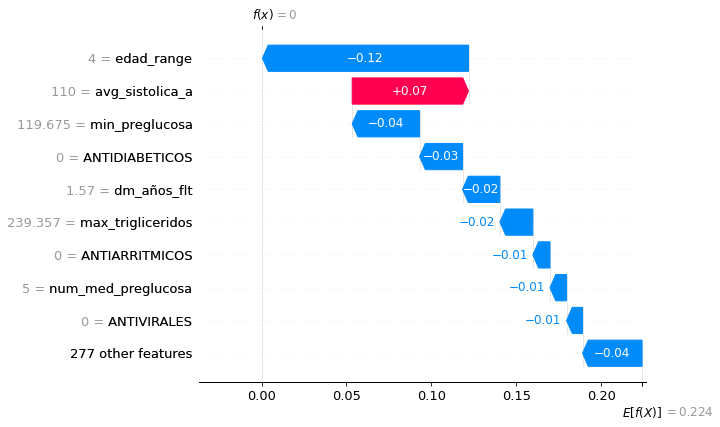

In [56]:
# train an XGBoost model
#X, y = shap.datasets.boston()
model = xgboost.XGBRegressor().fit(X_train, y_train)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

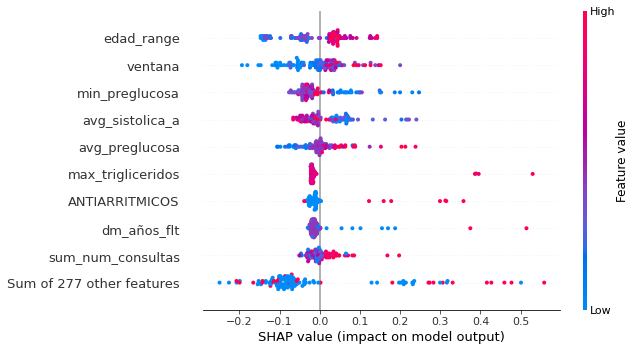

In [57]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

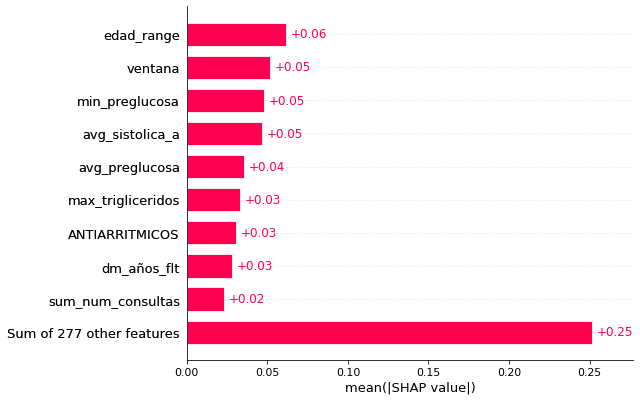

In [58]:
shap.plots.bar(shap_values)